In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import ta
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = yf.download("ETH-USD")[["Open", "High", "Low", "Adj Close", "Volume"]]

df.columns = ["open", "high", "low", "close", "volume"]


[*********************100%***********************]  1 of 1 completed


In [3]:
def feature_engineering(df):
  """ Create new variables"""
  
  # We copy the dataframe to avoid interferences in the data
  df_copy = df.dropna().copy()
  
  # Create the returns
  df_copy["returns"] = df_copy["close"].pct_change(1)

  # Create the SMAs
  df_indicators = ta.add_all_ta_features(
  df, open="open", high="high", low="low", close="close", volume="volume", fillna=True).shift(1)
  
  dfc = pd.concat((df_indicators, df_copy), axis=1)

  return dfc.dropna()


In [9]:
target_df = feature_engineering(df)
target_df

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,returns
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,308.644989,329.451996,307.056000,320.884003,8.932500e+08,2.097921e+08,8.932500e+08,0.234864,0.000000e+00,0.000000,...,-0.108090,-0.432358,-0.064911,-0.012982,-0.051928,308.896568,-6.741069,-6.979036,-6.741069,-0.067411
2017-11-11,320.670990,324.717987,294.541992,299.252991,8.859860e+08,-3.995582e+08,7.264000e+06,-0.224567,-1.916477e+10,-29.372702,...,-0.201044,-0.371817,-0.507515,-0.111889,-0.395627,310.793543,5.155507,5.027009,-1.933098,0.051555
2017-11-12,298.585999,319.453003,298.191986,314.681000,8.423010e+08,6.463645e+07,8.495650e+08,0.024656,-1.457052e+10,-2.038246,...,-0.313362,-0.449272,5.726172,1.055723,4.670449,309.374202,-2.152342,-2.175842,-4.043833,-0.021523
2017-11-13,314.690002,319.153015,298.513000,307.907990,1.613480e+09,-7.998539e+07,-7.639149e+08,-0.018887,-1.405017e+10,0.013449,...,-0.386855,-0.293972,5.641101,1.972799,3.668302,312.789240,2.860599,2.820448,-1.298912,0.028606
2017-11-14,307.024994,328.415009,307.024994,316.716003,1.041890e+09,-1.777932e+08,2.779750e+08,-0.033693,-1.073201e+10,18.245009,...,-0.326236,0.242474,5.724812,2.723202,3.001610,322.829941,6.603711,6.394813,5.219023,0.066037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,1298.882446,1302.295288,1211.329590,1287.221069,2.092054e+10,2.439785e+12,1.152469e+12,-0.092941,-1.083005e+12,17.112412,...,0.780064,-2.936352,12.059040,13.965517,-1.906477,1399.100007,-2.482305,-2.513634,291.190680,-0.024823
2022-11-13,1287.438354,1288.150879,1242.152222,1255.268311,1.096496e+10,2.435073e+12,1.141504e+12,-0.124313,-9.783411e+11,3.498306,...,0.035091,-2.979894,6.924654,12.557345,-5.632690,1386.754319,-2.664697,-2.700844,280.766633,-0.026647
2022-11-14,1255.441284,1271.712524,1208.520996,1221.819214,1.071746e+10,2.428866e+12,1.130786e+12,-0.135003,-8.897909e+11,-14.760842,...,-0.657521,-2.770447,4.426153,10.931106,-6.504954,1368.647938,1.619309,1.606338,286.932423,0.016193


In [27]:
# Percentage train set
split = int(0.80*len(target_df))

# Train set creation
X_train = target_df.iloc[:split,6:dfc.shape[1]-1]
y_train = target_df[["returns"]].iloc[:split]


# Test set creation
X_test = target_df.iloc[split:,6:dfc.shape[1]-1]
y_test = target_df[["returns"]].iloc[split:]

In [30]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# DIMENSION REDUCTION
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print(f"Without PCA: {np.shape(X_train)} \nWith PCA: {np.shape(X_train_pca)}")

Without PCA: (1466, 90) 
With PCA: (1466, 6)


In [33]:
# Import the class
from sklearn.svm import SVR

# Initialize the class
reg = SVR()

# Fit the model
reg.fit(X_train_pca, y_train)

SVR()

<AxesSubplot:xlabel='Date'>

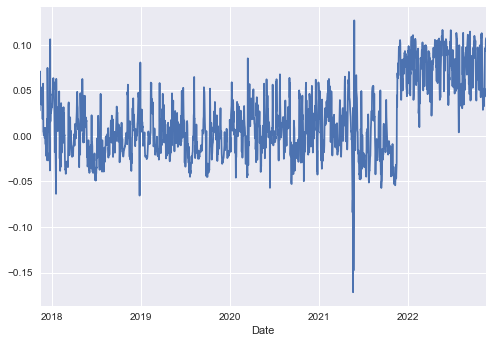

In [35]:
# Create predictions for the whole dataset
X = np.concatenate((X_train_pca, X_test_pca), axis=0)

target_df["prediction"] = reg.predict(X)

# We verify that the algorithm doesn't predict only way (positive or negative)
target_df["prediction"].plot()

In [36]:
def BackTest(serie, annualiazed_scalar=252):
  def drawdown_function(serie):

    # We compute Cumsum of the returns
    cum = serie.dropna().cumsum() + 1

    # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
    running_max = np.maximum.accumulate(cum)

    # We compute drawdown
    drawdown = cum/running_max - 1
    return drawdown

  # Import the benchmark
  sp500 = yf.download("^GSPC")["Adj Close"].pct_change(1)
  
  # Change the name
  sp500.name = "SP500"

  # Concat the returns and the sp500
  val = pd.concat((serie,sp500), axis=1).dropna()
  # Compute the drawdown
  drawdown = drawdown_function(serie)*100
  
  # Compute max drawdown
  max_drawdown = -np.min(drawdown)




  # Put a subplots
  fig, (cum, dra) = plt.subplots(1,2, figsize=(20,6))
  
  # Put a Suptitle
  fig.suptitle("Backtesting", size=20)

  # Returns cumsum chart
  cum.plot(serie.cumsum()*100, color="#39B3C7")

  # SP500 cumsum chart
  cum.plot(val["SP500"].cumsum()*100, color="#B85A0F")

  # Put a legend
  cum.legend(["Portfolio", "SP500"])
  
  # Set individual title
  cum.set_title("Cumulative Return", size=13)

  cum.set_ylabel("Cumulative Return %", size=11)

  # Put the drawdown
  dra.fill_between(drawdown.index,0,drawdown, color="#C73954", alpha=0.65)

  # Set individual title
  dra.set_title("Drawdown", size=13)

  dra.set_ylabel("drawdown in %", size=11)

  # Plot the graph
  plt.show()


  # Compute the sortino
  sortino = np.sqrt(annualiazed_scalar) * serie.mean()/serie.loc[serie<0].std()

  # Compute the beta
  beta = np.cov(val[["return", "SP500"]].values,rowvar=False)[0][1] / np.var(val["SP500"].values)

  # Compute the alpha
  alpha = annualiazed_scalar * (serie.mean() - beta*serie.mean())

  # Print the statistics
  print(f"Sortino: {np.round(sortino,3)}")
  print(f"Beta: {np.round(beta,3)}")
  print(f"Alpha: {np.round(alpha*100,3)} %")
  print(f"MaxDrawdown: {np.round(max_drawdown,3)} %")

[*********************100%***********************]  1 of 1 completed


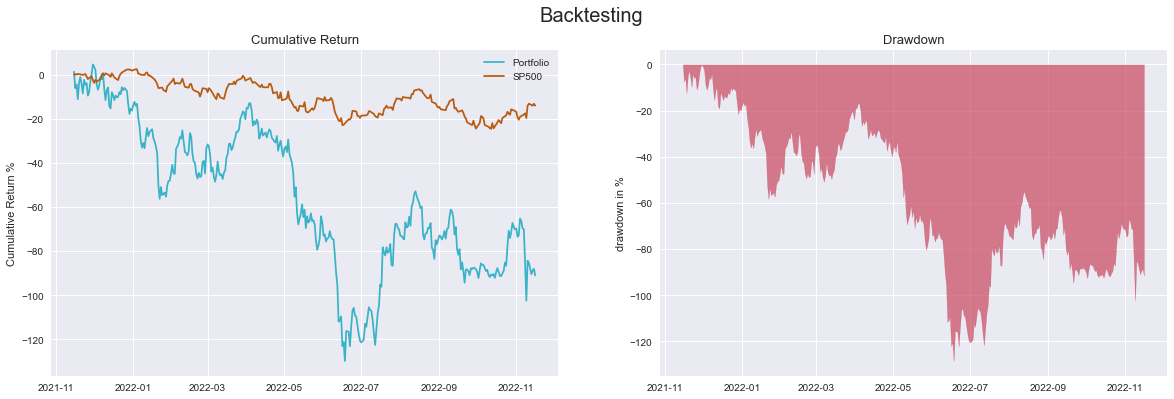

Sortino: -1.207
Beta: 1.767
Alpha: 47.882 %
MaxDrawdown: 128.441 %


In [38]:
# Compute the position
target_df["position"] = np.sign(target_df["prediction"])

# Compute the returns
target_df["strategy"] = target_df["returns"] * target_df["position"].shift(1)

target_df["return"] = target_df["strategy"]
BackTest(target_df["return"].iloc[split:])


In [39]:
target_df

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,returns,prediction,position,strategy,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,308.644989,329.451996,307.056000,320.884003,8.932500e+08,2.097921e+08,8.932500e+08,0.234864,0.000000e+00,0.000000,...,-0.051928,308.896568,-6.741069,-6.979036,-6.741069,-0.067411,0.028082,1.0,NaN,NaN
2017-11-11,320.670990,324.717987,294.541992,299.252991,8.859860e+08,-3.995582e+08,7.264000e+06,-0.224567,-1.916477e+10,-29.372702,...,-0.395627,310.793543,5.155507,5.027009,-1.933098,0.051555,0.070945,1.0,0.051555,0.051555
2017-11-12,298.585999,319.453003,298.191986,314.681000,8.423010e+08,6.463645e+07,8.495650e+08,0.024656,-1.457052e+10,-2.038246,...,4.670449,309.374202,-2.152342,-2.175842,-4.043833,-0.021523,0.037257,1.0,-0.021523,-0.021523
2017-11-13,314.690002,319.153015,298.513000,307.907990,1.613480e+09,-7.998539e+07,-7.639149e+08,-0.018887,-1.405017e+10,0.013449,...,3.668302,312.789240,2.860599,2.820448,-1.298912,0.028606,0.041438,1.0,0.028606,0.028606
2017-11-14,307.024994,328.415009,307.024994,316.716003,1.041890e+09,-1.777932e+08,2.779750e+08,-0.033693,-1.073201e+10,18.245009,...,3.001610,322.829941,6.603711,6.394813,5.219023,0.066037,0.040695,1.0,0.066037,0.066037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,1298.882446,1302.295288,1211.329590,1287.221069,2.092054e+10,2.439785e+12,1.152469e+12,-0.092941,-1.083005e+12,17.112412,...,-1.906477,1399.100007,-2.482305,-2.513634,291.190680,-0.024823,0.096520,1.0,-0.024823,-0.024823
2022-11-13,1287.438354,1288.150879,1242.152222,1255.268311,1.096496e+10,2.435073e+12,1.141504e+12,-0.124313,-9.783411e+11,3.498306,...,-5.632690,1386.754319,-2.664697,-2.700844,280.766633,-0.026647,0.096095,1.0,-0.026647,-0.026647
2022-11-14,1255.441284,1271.712524,1208.520996,1221.819214,1.071746e+10,2.428866e+12,1.130786e+12,-0.135003,-8.897909e+11,-14.760842,...,-6.504954,1368.647938,1.619309,1.606338,286.932423,0.016193,0.093433,1.0,0.016193,0.016193
